In [26]:
import lightgbm as lgb

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split, ParameterGrid
from sklearn.metrics import confusion_matrix, mean_squared_error, f1_score
from sklearn.datasets import load_iris, load_digits, load_boston

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

rng = np.random.RandomState(950530)
lgb.__version__

'3.1.1'

- LightGBM의 학습데이터는 모두 수치형이여야한다. (범주형 변수도, 수치형으로 바꾸어줘야한다.)
    - Binary
    - Multi-class(category type으로 변수 타입을 변경해주는 것이 필수, 다음에 모델에 categorical variable이라고 알려줘야한다. )
    - Numerical
        - 이산형
        - 연속형

## 의문1. 수치형변수는 그대로 사용해도 문제가 없을까?

In [71]:
boston = load_boston()

In [72]:
pd.concat([pd.DataFrame(boston.data), pd.DataFrame(boston.target)], axis = 1).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


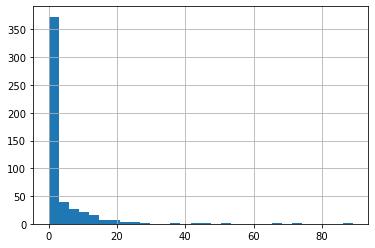

In [73]:
pd.DataFrame(boston.data)[0].hist(bins = 30)

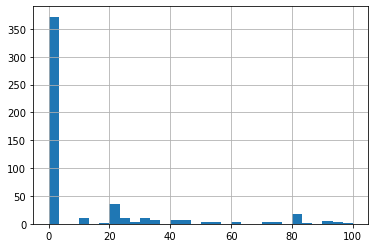

In [74]:
pd.DataFrame(boston.data)[1].hist(bins = 30)

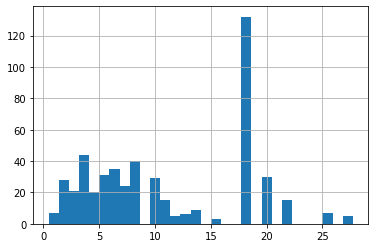

In [75]:
pd.DataFrame(boston.data)[2].hist(bins = 30)

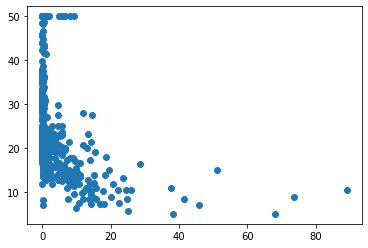

In [76]:
plt.scatter(boston.data[:,0], boston.target)

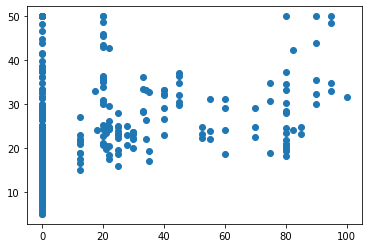

In [77]:
plt.scatter(boston.data[:,1], boston.target)

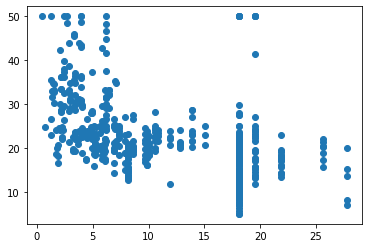

In [78]:
plt.scatter(boston.data[:,2], boston.target)

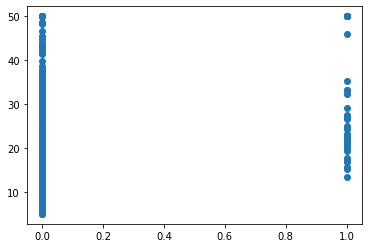

In [79]:
plt.scatter(boston.data[:,3], boston.target)

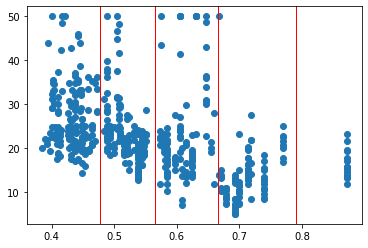

In [80]:
plt.scatter(x = boston.data[:,4], y = boston.target)
plt.axvline(x=0.477, color='r', linewidth=1)
plt.axvline(x=0.565, color='r', linewidth=1)
plt.axvline(x=0.665, color='r', linewidth=1)
plt.axvline(x=0.79, color='r', linewidth=1)

In [81]:
new_4 = boston.data[:,4].copy()
new_4[:] = 0
new_4[boston.data[:,4] > 0.565] = 1
new_4[boston.data[:,4] > 0.665] = 2
new_4[boston.data[:,4] > 0.790] = 3


In [83]:
new_4


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

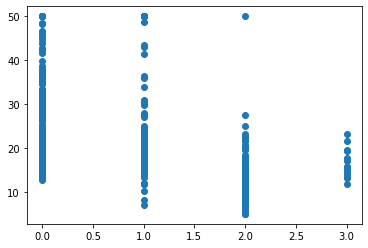

In [84]:
plt.scatter(new_4, boston.target)

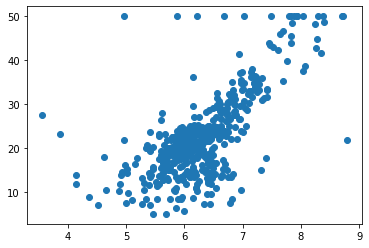

In [42]:
plt.scatter(boston.data[:,5], boston.target)

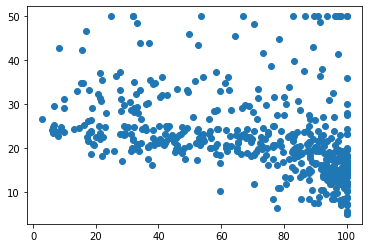

In [43]:
plt.scatter(boston.data[:,6], boston.target)

In [31]:
boston.target.shape

(506,)

In [33]:
.shape

(506,)

In [86]:
#original version
X = boston.data
y = boston.target

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [100]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train, verbose = -2)#, eval_set = [X_test, y_test])
predictions = model.predict(X_test)
actuals = y_test

mean_squared_error(actuals, predictions)

15.746956807025702

In [117]:
#not origin
X = boston.data.copy()
X = X[:,(0,1,2,3,5,6,7,8,9,10,11,12)]
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [118]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train, verbose = -2)#, eval_set = [X_test, y_test])
predictions = model.predict(X_test)
actuals = y_test

mean_squared_error(actuals, predictions)

13.251729032573996